In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
train_dir = 'C:/Users/Siddu/Downloads/Plant Care/ML/PlantDisease/Train'
valid_dir = 'C:/Users/Siddu/Downloads/Plant Care/ML/PlantDisease/Validation'
test_dir = 'C:/Users/Siddu/Downloads/Plant Care/ML/PlantDisease/Test'

train_datagen = ImageDataGenerator(
    rescale=1./255,         
    rotation_range=40,    
    width_shift_range=0.2,
    height_shift_range=0.2, 
    shear_range=0.2,      
    zoom_range=0.2,       
    horizontal_flip=True, 
    fill_mode='nearest'   
)

test_datagen = ImageDataGenerator(rescale=1./255) 


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=32,
    class_mode='categorical'  
)

validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(3, activation='softmax'))  # 3 classes (Healthy, Powdery, Rust)


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'C:/Users/Siddu/Downloads/Plant Care/ML/PlantDisease/Train'
valid_dir = 'C:/Users/Siddu/Downloads/Plant Care/ML/PlantDisease/Validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,         
    rotation_range=40,    
    width_shift_range=0.2,
    height_shift_range=0.2, 
    shear_range=0.2,      
    zoom_range=0.2,       
    horizontal_flip=True, 
    fill_mode='nearest'   
)

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=32,
    class_mode='categorical'  
)

validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/20
41/41 [==============================] - 128s 3s/step - loss: 1.0722 - accuracy: 0.4907 - val_loss: 0.5534 - val_accuracy: 0.8125
Epoch 2/20
41/41 [==============================] - 102s 2s/step - loss: 0.6104 - accuracy: 0.7426 - val_loss: 0.6627 - val_accuracy: 0.7812
Epoch 3/20
41/41 [==============================] - 102s 2s/step - loss: 0.4763 - accuracy: 0.8349 - val_loss: 0.5922 - val_accuracy: 0.8438
Epoch 4/20
41/41 [==============================] - 101s 2s/step - loss: 0.4460 - accuracy: 0.8403 - val_loss: 0.3842 - val_accuracy: 0.8750
Epoch 5/20
41/41 [==============================] - 102s 2s/step - loss: 0.3690 - accuracy: 0.8713 - val_loss: 0.3808 - val_accuracy: 0.8750
Epoch 6/20
41/41 [==============================] - 105s 3s/step - loss: 0.4049 - accuracy: 0.8690 - val_loss: 0.4469 - val_accuracy: 0.8438
Epoch 7/20
41/41 [==============================] - 99s 2s/step - loss: 0.3482 - accuracy: 0.8876 - val_loss: 0.1031 - val_accuracy: 0.9375
Epoch 8/20
41/

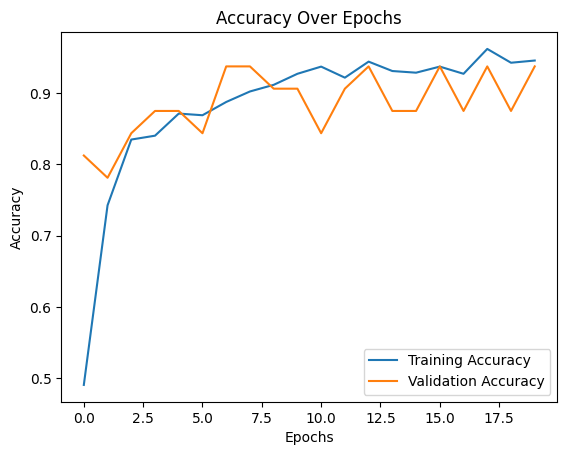

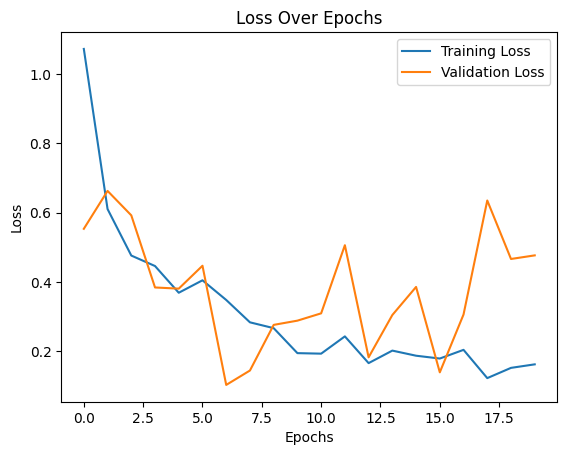

In [6]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [10]:
model.save('plant_disease_model.keras')


In [9]:
from keras.models import load_model

loaded_model = load_model('plant_disease_model.keras')


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up the test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values to [0, 1]

test_generator = test_datagen.flow_from_directory(
    'C:/Users/Siddu/Downloads/Plant Care/ML/PlantDisease/Test',         # Replace with the path to your test dataset
    target_size=(150, 150),      # Adjust to the input size of your model
    batch_size=32,               # Define the batch size
    class_mode='categorical',    # Use 'categorical' for multi-class classification
    shuffle=False                # Do not shuffle for evaluation
)


Found 150 images belonging to 3 classes.


In [14]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


5/5 [==============================] - 12s 2s/step - loss: 0.3225 - accuracy: 0.9267
Test Loss: 0.32246869802474976, Test Accuracy: 0.9266666769981384


In [29]:
# Step 1: Load the image and preprocess
img_path = 'powderyplant.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(150, 150))  # Adjust target_size to match your input shape
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize if your model expects normalized inputs

# Step 2: Predict the class
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)

# Step 3: Define class names
class_names = ['Healthy', 'Powdery Mildew', 'Rust']  # Update based on your dataset classes
predicted_class_name = class_names[predicted_class_index]

# Step 4: Display the prediction

print(f"Predicted Class: {predicted_class_name}")


1/1 [==============================] - 0s 67ms/step
Predicted Class: Rust


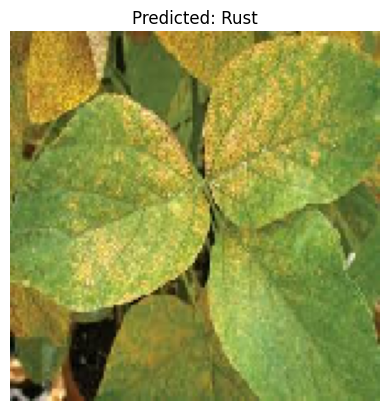

In [30]:
import matplotlib.pyplot as plt

# Display the image
img = image.load_img(img_path, target_size=(150, 150))  # Adjust to match your input size
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')  # Hide axes
plt.show()
